<a href="https://colab.research.google.com/github/KanVux/Spam_Email_Detection/blob/main/CNN-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Thu thập dữ liệu

In [ ]:
!pip install tensorflow
!pip install scikeras
!pip install imblearn

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Load file csv vào một dataframe và hiển thị các mẫu email đầu của dataset
df = pd.read_csv('/content/drive/MyDrive/NienLuan/Dataset/spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
# Có một cột không tên chỉ có số tăng dần -> không hữu ích -> xóa bỏ
columns_need_to_drop = ['Unnamed: 0']
df.drop(columns_need_to_drop, axis=1, inplace=True)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# Kiểm tra có các email bị trùng nên cần được xóa
df[df.duplicated()]
# Loại bỏ các email bị trùng
df.drop_duplicates(inplace=True)

label
ham     3531
spam    1462
Name: count, dtype: int64


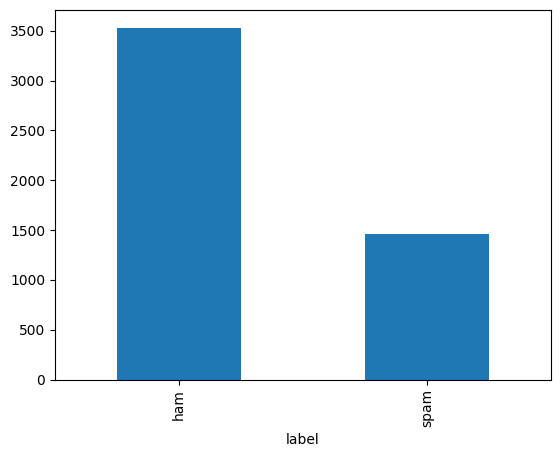

In [ ]:
# Kiểm tra số lượng email có ích (ham) và email spam
df["label"].value_counts().plot(kind="bar");
dff = df["label"].value_counts()
print(dff)

In [ ]:
# X = nội dung email (input: nội dung feed cho các model)
X = df['text']
# y = label_num (output: lớp cần được phân loại)
y = df['label_num']

print(X,y)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 4993, dtype: object 0       0
1       0
2       0
3       1
4       0
       ..
5165    0
5166    0
5167    0
5169    0
5170    1
Name: label_num, Length: 4993, dtype: int64


## Tiền xử lý dữ liệu (Preprocessing)

In [ ]:
!pip install nltk

In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tải dữ liệu NLTK cần thiết
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Lấy các từ dừng (stopwords) trong tiếng Anh
stop_word = set(stopwords.words('english'))

# Khai báo bổ đề ngôn ngữ
lemmatizer = WordNetLemmatizer()

# Loại bỏ các chữ cái lặp lại liên tiếp trong từ
def remove_duplicate_letters(text):
    """Loại bỏ các chữ cái lặp lại liên tiếp trong một từ."""
    if not text:
        return ""
    result = text[0]
    for char in text[1:]:
        if char != result[-1]:
            result += char
    return result

# Tiền xử lý dữ liệu
def preprocess_text(text):
    """Tiền xử lý chuỗi văn bản."""
    # Đổi toàn bộ chữ thành chữ thường
    text = text.lower()
    # Loại bỏ các dấu câu và ký tự đặc biệt
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text)
    # Loại bỏ các ký tự số
    text = re.sub(r'\d+', '', text)
    # Áp dụng hàm loại bỏ chữ cái lặp lại
    text = ' '.join([remove_duplicate_letters(word) for word in text.split()])
    # Tokenize từ và loại bỏ các từ dừng (stopwords)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_word]
    # Chuyển các từ về dạng nguyên bản (lemmatize)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Trả về chuỗi đã tiền xử lý
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
X=df['cleaned_text']
df.head()

,label,text,label_num,cleaned_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter folow note gave m...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january se atached file hplnol...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window ofice cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal bok teco pvr revenu...


# Vecto hóa

## Với Word2Vec

In [ ]:
# from gensim.models import Word2Vec
# from nltk.tokenize import word_tokenize

# # Tokenize dữ liệu
# X_tokenized= X.apply(lambda x: word_tokenize(x.lower()))

# # Huấn luyện mô hình Word2Vec
# word2vec_model = Word2Vec(X_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# # Kiểm tra vector của một từ bất kỳ
# print(word2vec_model.wv['free'])


In [ ]:
# def get_sentence_vector(sentence, model, vector_size):
#     words = word_tokenize(sentence.lower())
#     word_vectors = [model.wv[word] for word in words if word in model.wv]
#     if len(word_vectors) > 0:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(vector_size)  # Nếu không có từ nào trong Word2Vec

# # Áp dụng cho toàn bộ dữ liệu
# X = np.array([get_sentence_vector(sentence, word2vec_model, 100) for sentence in X])


## Với TF-IDF

In [ ]:
# Chuyển đổi văn bản thành vector TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X).toarray()

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Sử dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print(f"Số lượng mẫu trước SMOTE: {X.shape[0]}")
print(f"Số lượng mẫu sau SMOTE: {X_smote.shape[0]}")


Số lượng mẫu trước SMOTE: 4993
Số lượng mẫu sau SMOTE: 7062


# Chia dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5649, 1000), (1413, 1000), (5649,), (1413,))

# Reshape

In [ ]:
# Reshape dữ liệu để phù hợp với đầu vào của CNN
X_train_smote = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Mô hình

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Khởi tạo mô hình
model = Sequential([
    Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Giảm số lượng filters
    MaxPooling1D(pool_size=2),
    Dropout(0.3),  # Dropout để giảm overfitting
    Flatten(),
    Dropout(0.3),  # Dropout để giảm overfitting
    Dense(1, activation='sigmoid')  # Vì đây là bài toán nhị phân
])

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 998, 16)             │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 499, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 499, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7984)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7984)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           7,985 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,049 (31.44 KB)

 Trainable params: 8,049 (31.44 KB)

 Non-trainable params: 0 (0.00 B)

# Huấn luyện

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True,mode='max')
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9837 - loss: 0.0600 - val_accuracy: 0.9724 - val_loss: 0.0883
Epoch 2/20
 5/89 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9915 - loss: 0.0304

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9867 - loss: 0.0484 - val_accuracy: 0.9710 - val_loss: 0.0887
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9851 - loss: 0.0474 - val_accuracy: 0.9724 - val_loss: 0.0866
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9813 - loss: 0.0533 - val_accuracy: 0.9731 - val_loss: 0.0864
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9871 - loss: 0.0431 - val_accuracy: 0.9724 - val_loss: 0.0860
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9890 - loss: 0.0425 - val_accuracy: 0.9724 - val_loss: 0.0868
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9834 - loss: 0.0513 - val_accuracy: 0.9724 - val_loss: 0.0861
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9902 - loss: 0.0390 - val_accuracy: 0.9738 - val_loss: 0.0852
Epoch 9/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9909 - loss: 0.0362 - val_accuracy: 0.9724 - val_loss: 0.

# Đánh giá kết quả

In [ ]:
# Đánh giá mô hình trên tập test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Độ chính xác trên tập test: {accuracy*100:.2f}%")

# Dự đoán trên dữ liệu mới
y_pred = (model.predict(X_test) > 0.5).astype("int32")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9715 - loss: 0.0903
Độ chính xác trên tập test: 97.03%
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


# Trực quan hóa kết quả

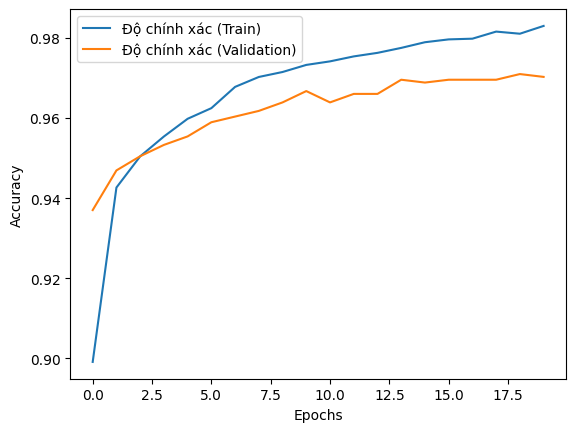

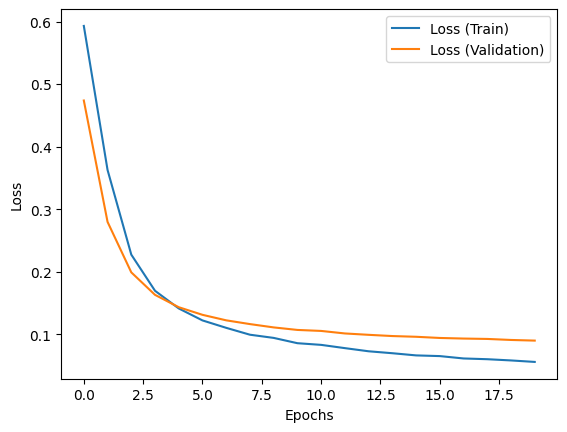

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Trực quan hóa quá trình huấn luyện
plt.plot(history.history['accuracy'], label='Độ chính xác (Train)')
plt.plot(history.history['val_accuracy'], label='Độ chính xác (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


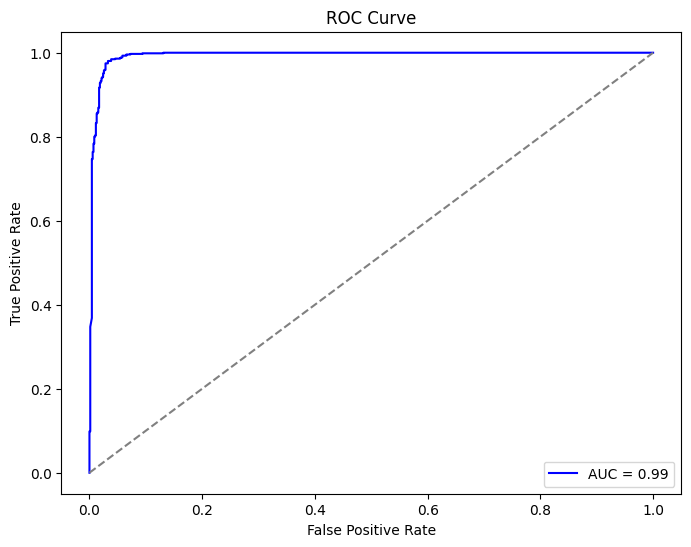

AUC Score: 0.99


In [ ]:
# Tính toán giá trị dự đoán xác suất
y_pred_proba = model.predict(X_test).ravel()

# Tính FPR, TPR và thresholds cho ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Vẽ ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")


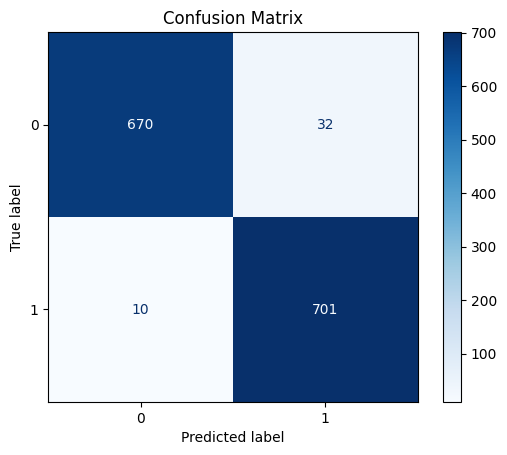

In [ ]:
# Dự đoán nhãn cuối cùng
y_pred = (y_pred_proba > 0.5).astype("int32")

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['label_num'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       702
           1       0.96      0.99      0.97       711

    accuracy                           0.97      1413
   macro avg       0.97      0.97      0.97      1413
weighted avg       0.97      0.97      0.97      1413



# Lưu mô hình

In [ ]:
# Lưu mô hình
model.save("/content/drive/MyDrive/NienLuan/Model/cnn_spam_classifier.h5")
# model.save("/content/drive/MyDrive/NienLuan/Model/cnn_spam_classifier_w2v.h5")

# New Section

In [ ]:
import tensorflow
loaded_model = tensorflow.keras.models.load_model("/content/drive/MyDrive/NienLuan/Model/lstm_spam_classifier.h5")

In [ ]:
import pandas as pd
df_test = pd.read_csv('/content/drive/MyDrive/NienLuan/Dataset/spam.csv')

In [ ]:
df_test['cleaned_text'] = df_test['Message'].apply(preprocess_text)
test_emails_vector = vectorizer.transform(df_test['cleaned_text'])
df_test['label_num'] = df_test['Category'].map({'ham': 0, 'spam': 1})

In [ ]:
# Nếu mô hình yêu cầu đầu vào 3 chiều:
test_emails_vector = test_emails_vector.toarray().reshape(test_emails_vector.shape[0], test_emails_vector.shape[1], 1)
# Nếu mô hình yêu cầu đầu vào 2 chiều:
# test_emails_vector = test_emails_vector.toarray()

In [ ]:
predictions = loaded_model.predict(test_emails_vector)
predicted_labels = (predictions > 0.5).astype(int)
predicted_labels
# df_test['Category'] = [1 if label == 'spam' else 0 for label in predicted_labels]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_test['label_num'], predicted_labels)
print(f"Accuracy on new test emails: {accuracy:.2f}")

175/175 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step
Accuracy on new test emails: 0.86
